# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
try:
    df = pd.read_csv("/content/train_df.csv")
except pd.errors.ParserError:
    # Try with a different delimiter, e.g., semicolon
    df = pd.read_csv("/content/train_df.csv", sep=';')
df.head()

,order_id,total_qty,total_weight_gr,total_returned_qty,Total Diskon,product_categories,num_product_categories,Status Pesanan,Alasan Pembatalan,Opsi Pengiriman,Metode Pembayaran,Kota/Kabupaten,Provinsi,Ongkos Kirim Dibayar oleh Pembeli,Estimasi Potongan Biaya Pengiriman,Total Pembayaran,Perkiraan Ongkos Kirim,Waktu Pesanan Dibuat,source_file
0,ORD_0000001,2,2000,0,0,Celengan,1,Selesai,NaN,Reguler (Cashless)-SPX Standard,Saldo ShopeePay,KOTA SERANG,BANTEN,0,10000,38300,10000,2024-04-01 00:15,AprilSales2024.xlsx
1,ORD_0000002,1,500,0,0,Celengan,1,Selesai,NaN,Hemat Kargo-SPX Hemat,COD (Bayar di Tempat),KOTA SEMARANG,JAWA TENGAH,0,14500,18576,14500,2024-04-01 01:47,AprilSales2024.xlsx
2,ORD_0000003,1,500,0,0,Celengan,1,Selesai,NaN,Hemat Kargo-SPX Hemat,SeaBank Bayar Instan,KAB. BOGOR,JAWA BARAT,0,8000,7069,8000,2024-04-01 04:25,AprilSales2024.xlsx
3,ORD_0000004,2,400,0,0,Mangkok Sambal / Saus,1,Selesai,NaN,Hemat Kargo-SPX Hemat,COD (Bayar di Tempat),KOTA JAMBI,JAMBI,0,20000,32200,20000,2024-04-01 04:41,AprilSales2024.xlsx
4,ORD_0000005,3,3600,0,0,"Keranjang, Other, Tempat Nasi",3,Batal,Dibatalkan oleh Pembeli. Alasan: Ubah Pesanan ...,Hemat Kargo-SPX Hemat,COD (Bayar di Tempat),KOTA TANGERANG,BANTEN,0,0,0,8000,2024-04-01 06:12,AprilSales2024.xlsx


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20848 entries, 0 to 20847
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   order_id                            20848 non-null  object
 1   total_qty                           20848 non-null  int64 
 2   total_weight_gr                     20848 non-null  int64 
 3   total_returned_qty                  20848 non-null  int64 
 4   Total Diskon                        20848 non-null  int64 
 5   product_categories                  20848 non-null  object
 6   num_product_categories              20848 non-null  int64 
 7   Status Pesanan                      20848 non-null  object
 8   Alasan Pembatalan                   2830 non-null   object
 9   Opsi Pengiriman                     20848 non-null  object
 10  Metode Pembayaran                   20848 non-null  object
 11  Kota/Kabupaten                      20848 non-null  ob

,0
order_id,0
total_qty,0
total_weight_gr,0
total_returned_qty,0
Total Diskon,0
product_categories,0
num_product_categories,0
Status Pesanan,0
Alasan Pembatalan,18018
Opsi Pengiriman,0


/tmp/ipython-input-2126722303.py:18: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


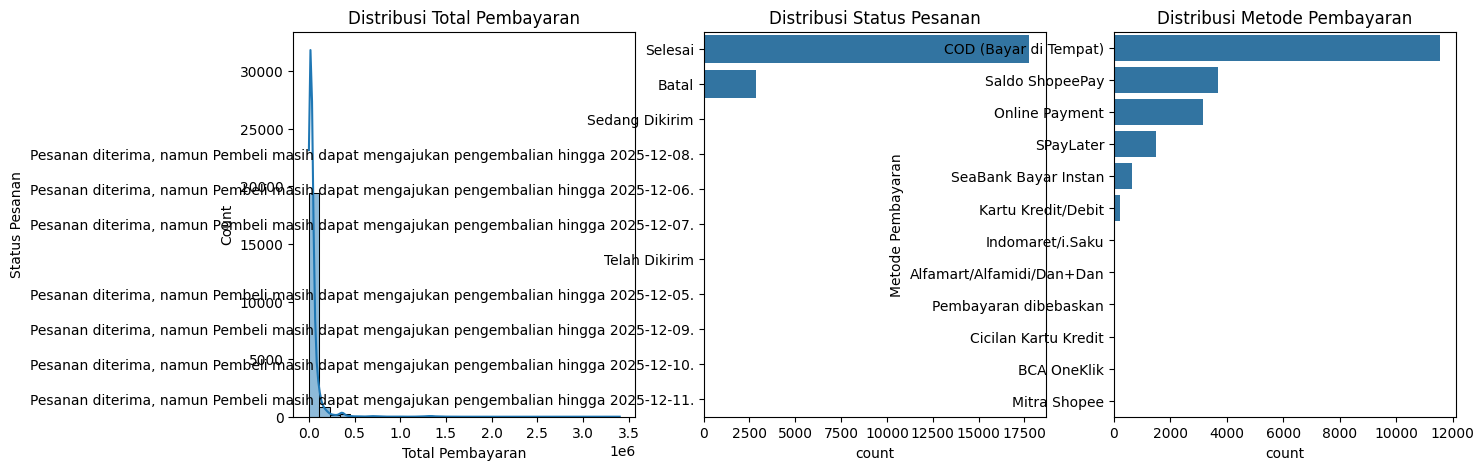

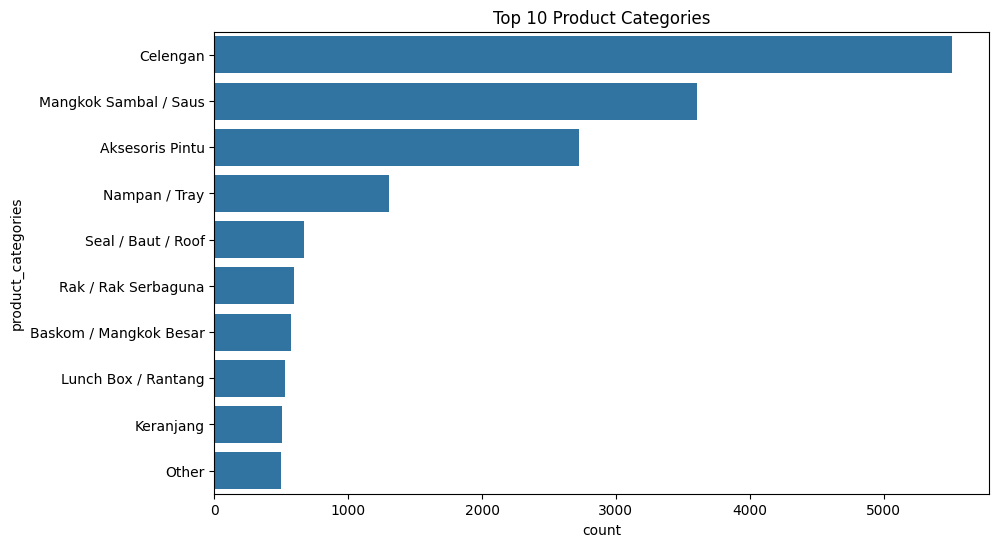

In [6]:
plt.figure(figsize=(15, 5))

# 1. Distribusi Total Pembayaran
plt.subplot(1, 3, 1)
sns.histplot(df['Total Pembayaran'], bins=30, kde=True)
plt.title('Distribusi Total Pembayaran')

# 2. Distribusi Status Pesanan
plt.subplot(1, 3, 2)
sns.countplot(data=df, y='Status Pesanan', order=df['Status Pesanan'].value_counts().index)
plt.title('Distribusi Status Pesanan')

# 3. Distribusi Metode Pembayaran
plt.subplot(1, 3, 3)
sns.countplot(data=df, y='Metode Pembayaran', order=df['Metode Pembayaran'].value_counts().index)
plt.title('Distribusi Metode Pembayaran')

plt.tight_layout()
plt.show()

# 4. Top 10 Product Categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='product_categories', order=df['product_categories'].value_counts().head(10).index)
plt.title('Top 10 Product Categories')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
#1
df_cleaned = df.dropna()
#2
print(f"Number of duplicate rows before dropping: {df_cleaned.duplicated().sum()}")
df_cleaned_before_dedup = df_cleaned.shape
df_cleaned = df_cleaned.drop_duplicates()
print(f"DataFrame shape before dropping duplicates: {df_cleaned_before_dedup}")
print(f"DataFrame shape after dropping duplicates: {df_cleaned.shape}")
#3
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
num_cols = df_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
df_cleaned[num_cols] = scaler.fit_transform(df_cleaned[num_cols])

print("Numerical features have been standardized.")
print(df_cleaned[num_cols].head())
#4
import pandas as pd

# Identify categorical columns (object type)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns

# Apply one-hot encoding
df_cleaned = pd.get_dummies(df_cleaned, columns=cat_cols, drop_first=True)

print("Categorical features have been one-hot encoded.")
print(df_cleaned.head())
#5
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap outliers
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers in numerical features have been handled using IQR capping.")
print(df_cleaned[num_cols].head())
#6


Number of duplicate rows before dropping: 0
DataFrame shape before dropping duplicates: (2573, 19)
DataFrame shape after dropping duplicates: (2573, 19)
Numerical features have been standardized.
    total_qty  total_weight_gr  total_returned_qty  Total Diskon  \
4   -0.008273         0.080749                 0.0      -0.05323   
6   -0.187911        -0.086875                 0.0      -0.05323   
8   -0.187911        -0.192743                 0.0      -0.05323   
10  -0.098092        -0.148632                 0.0      -0.05323   
11  -0.187911        -0.192743                 0.0      -0.05323   

    num_product_categories  Ongkos Kirim Dibayar oleh Pembeli  \
4                 3.405156                                0.0   
6                -0.220528                                0.0   
8                -0.220528                                0.0   
10               -0.220528                                0.0   
11               -0.220528                                0.0   

    